In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import scipy.stats as stats

%matplotlib inline 
import matplotlib.pyplot as plt

import math
import statsmodels.api as sm            # for autocorrelation function
import os
import seaborn as sns
import astroabc
import ipynb
import random
import timeit

from ipynb.fs.full.import_data import get_data, get_station_name # Import data

os.chdir('/home/waniomar/Office/Berkeley/Scripts/sde')

In [2]:
# import helper functions
from CatchmentBasics import *
from Data_analysis_helper import *

### Selected catchments

In [3]:
selected_lst = ['DryCreek','SagehenCreek','AndrewsForest','BonanzaCreek','CaliforniaCurrentEcosystem',
                'HubbardBrook','Kellogg','KonzaPrairie','Sevilleta','Reynolds']

In [4]:
### Trim table to the same record length

# Use the fucntion trim_short you can trim all the records based on the shorted one
# Discharge and ALL the ppt record length
# The trimmed table is ready to use
trimmed_table = {}

for ws in selected_lst:
    #print("\n"+ws)
    
    data = pd.read_csv('data/5_'+ws+'_final_cleaned.csv', index_col = 'DateTime')
    dis_stn = main_str_dic[ws][1]
    dis_ppt_data = subset_table(table=data,dis_stn=dis_stn,met_stn=[],acq_vars=['Discharge','Precipitation'])
    trimmed_table[ws] = trim_short(dis_ppt_data)
    #print('report data length for trimmed table')
    #report_length(trimmed_table)

LG_Discharge starts at 1999-02-06 ends at 2019-12-31
BRW_Precipitation starts at 2011-01-01 ends at 2019-12-31
LDP_Precipitation starts at 2007-01-01 ends at 2019-11-17
SCR_Precipitation starts at 2010-01-01 ends at 2018-10-15
TL_Precipitation starts at 1999-02-06 ends at 2018-10-09
LW_Precipitation starts at 1999-02-06 ends at 2018-10-09
The lastest starting date is 2011-01-01
The earliest ending date is 2018-10-09
Table start from 2011-01-01 to 2018-10-09
Sagehen_Discharge starts at 1956-10-01 ends at 2020-12-31
539lvl1B_Precipitation starts at 1978-10-01 ends at 2017-09-30
539lvl2_Precipitation starts at 1978-10-01 ends at 2017-09-30
540lvlB_Precipitation starts at 1980-10-01 ends at 2017-09-30
540lvl2_Precipitation starts at 1980-10-01 ends at 2017-09-30
541lvlB_Precipitation starts at 1978-10-01 ends at 2017-09-30
541lvl2_Precipitation starts at 1978-10-01 ends at 2017-09-30
wrcclvl1B_Precipitation starts at 1956-10-01 ends at 2007-06-30
wrcclvl2_Precipitation starts at 1956-10-01

In [5]:
trimmed_table['HubbardBrook']

,WS7_Discharge,WS1_Precipitation,WS2_Precipitation,WS3_Precipitation,WS4_Precipitation,WS5_Precipitation,WS6_Precipitation,WS7_Precipitation,WS8_Precipitation,WS9_Precipitation
DateTime,,,,,,,,,,
1995-01-01,11.190825,2.9,3.0,3.2,3.0,3.3,3.4,2.0,2.0,1.9
1995-01-02,10.384475,8.0,8.2,8.5,8.4,8.9,9.2,11.4,10.1,10.4
1995-01-03,9.636683,0.4,0.3,0.3,0.4,0.3,0.3,0.5,0.5,0.5
1995-01-04,8.919075,1.1,1.2,1.2,1.0,1.6,2.1,0.6,0.7,0.8
1995-01-05,8.182850,0.5,0.4,0.4,0.5,0.5,0.6,0.3,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...
2014-12-27,36.982848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-12-28,43.946908,11.1,11.3,11.6,10.9,11.1,11.0,7.5,7.6,8.3
2014-12-29,35.914143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# HJ Andrews 

In [6]:
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3000]
discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3000]['GSLOOK_Discharge'])
temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
temp[temp<0]=0
swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
sweb = swe/np.amax(swe)

HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmel

# Define SDE

In [7]:
random.seed(10)

def sde(par):
    x = np.zeros(n)
    for i in range(n - 1):
        x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
        1*(np.sqrt(par[3])*x[i]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
    return (1/par[0]*par[2]*x)

In [8]:


dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

par = [0.5,1, 18000,0.05,0.05,0.01]

data1 = sde(par)  # test model

In [9]:
def dist_metric(d,x):
    return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
dist_metric(data1, discharge)

0.7678162375878708

In [37]:
priors =  [('uniform', [0.01,2]), ('uniform', [0.0,10]),('normal', [18000, 2000]),('uniform', [0.0,0.02]),('uniform', [0.0,0.02]),('uniform', [0.0,0.0001])]

In [38]:
prop={'dfunc':dist_metric, 'tol_type':'exp','outfile':"data/HJA2.txt", 'verbose':1, 'adapt_t': True, 'mp': True, 'num_proc':20}

In [39]:
sampler = astroabc.ABC_class(6,100,discharge,[10,0.8],10000,priors,**prop)

	 	
	 ########################     astroABC     ########################	
	 	
	 Npart=100 	 numt=10000 	 tol=[10.0000,0.8000] exp
	 Priors= [('uniform', [0.01, 2]), ('uniform', [0.0, 10]), ('normal', [18000, 2000]), ('uniform', [0.0, 0.02]), ('uniform', [0.0, 0.02]), ('uniform', [0.0, 0.0001])]


<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:9: RuntimeWarning: overflow encountered in multiply
  return (1/par[0]*par[2]*x)
<ipython-input-36-badb0e4db0c5>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:9: Runt

<ipython-input-36-badb0e4db0c5>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in add
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:9: RuntimeWarning: overflow encountered in multiply
  return (1/par[0]*par[2]*x)
<ipython-input-36-badb0e4db0c5>:2: RuntimeWarning: overflow encountered in square
  return np.sum((d - x)**2)/np.sum((d - np.mean(d))**2)
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: overflow encountered in double_scalars
  x[i + 1] = x[i] -1/par[0]*x[i]*dt + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt + \
<ipython-input-34-b947d1ba2a0c>:6: RuntimeWarning: invalid value encountered in double_scala

In [40]:
start = timeit.default_timer()
sampler.sample(sde)
stop = timeit.default_timer()

print('Time: ', stop - start)  

	 Step: 0 	 tol: 10.0 	 Params: [1.0917525740230218, 5.261885628118491, 17947.15234483133, 0.010961602613154486, 0.00992175400941335, 5.1353041666982034e-05]
	 Step: 1 	 tol: 0.88662859455125 	 Params: [1.3906299541643952, 5.198858024595446, 15660.331095029891, 0.012743794638099897, 0.012695250233364139, 6.127237757763994e-05]
	 Step: 2 	 tol: 0.8 	 Params: [1.472192079284281, 5.891277096289914, 15491.434098336518, 0.012610605067113215, 0.014293704899621567, 6.375972139426068e-05]
Time:  45.08908532606438


In [10]:
# import  samples
data = ("data/HJA2.txt")
samples  =  pd.DataFrame(np.loadtxt('data/HJA2.txt', skiprows=1))
samplespar = samples[samples.columns[0:6]]


<AxesSubplot:title={'center':'Sample traces'}>

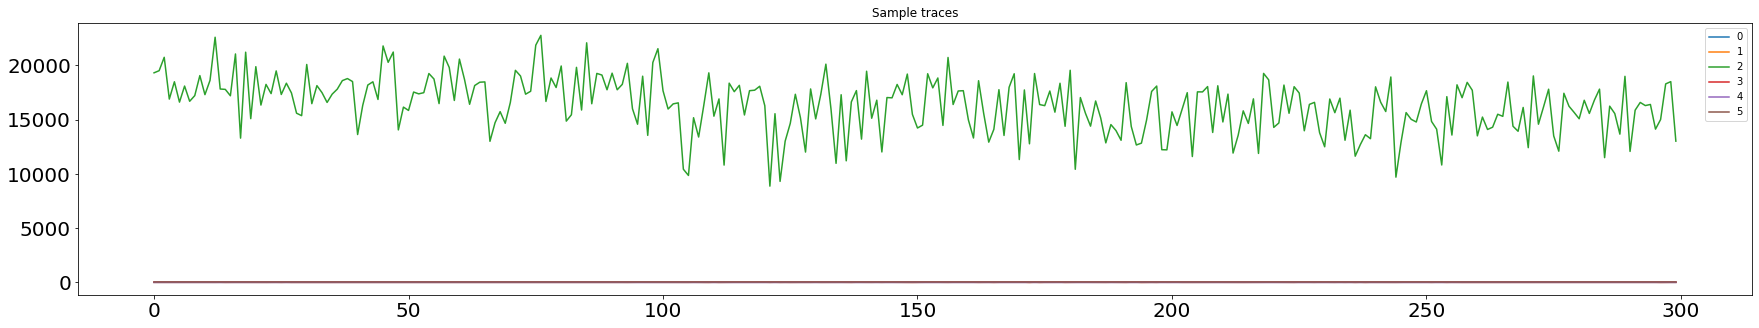

In [11]:
samplespar.plot(kind='line', figsize=[30,5], fontsize = 20, title = 'Sample traces')
#samplespar.plot(kind='hist',y ='AMS_cdx', figsize=[30,5], fontsize = 20, title = 'Maximum annual prcipitation')

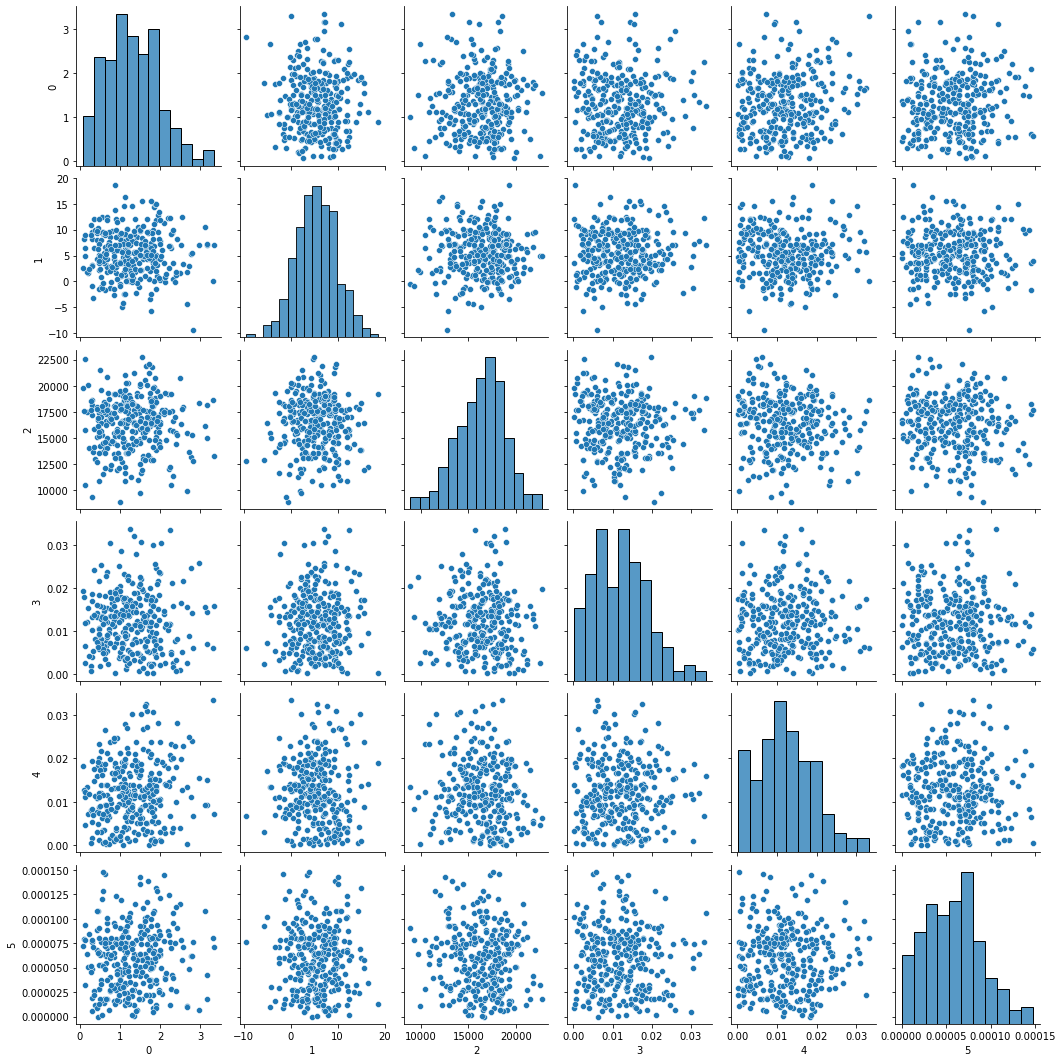

In [12]:
sns.pairplot(samplespar)

In [13]:
par = [np.asarray(samplespar)[:,0].mean(),np.asarray(samplespar)[:,1].mean(),np.asarray(samplespar)[:,2].mean(),np.asarray(samplespar)[:,3].mean(),np.asarray(samplespar)[:,4].mean(),np.asarray(samplespar)[:,5].mean()]
#par = np.array(samplespar)[pd.read_csv(filepath_or_buffer=data, delimiter  =' ',header =0)["\t.1"].idxmax(),:]

In [14]:
par = np.array(samplespar)[samples[6].idxmin(),:]
par

array([6.27625000e-01, 9.26673100e+00, 1.20883567e+04, 1.29920000e-02,
       8.12000000e-04, 7.50000000e-05])

In [15]:
n =3000
x = np.zeros([n,500])


dt = 0.1  # Time step.
T = 300.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.


for j in range(499):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[1]*sweb[i]*temp[i]*dt -1/par[0]*x[i,j]*dt + \
        1*(np.sqrt(par[3])*x[i,j]+np.sqrt(par[4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[5])*np.random.lognormal(0,np.sqrt(dt),1)
sim = 1/par[0]*par[2]*x

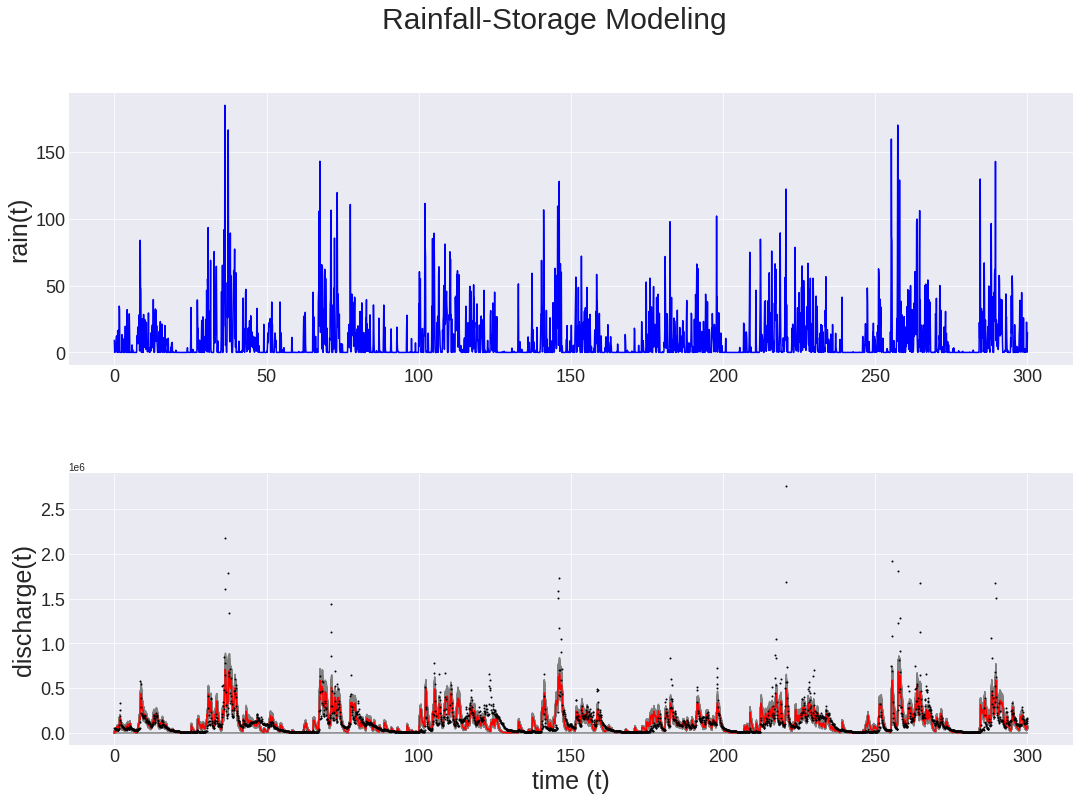

In [16]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test2.jpg',dpi = 150)

In [17]:
# With parametric uncertainty

par = np.array(samplespar)[np.random.randint(300,size =200)]
for j in range(199):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + 1*rain[i]*dt + 0*par[j,1]*sweb[i]*temp[i]*dt -1/par[j,0]*x[i,j]*dt + \
        1*(np.sqrt(par[j,3])*x[i,j]+np.sqrt(par[j,4])*rain[i])*np.random.normal(0,np.sqrt(dt),1)+ \
        np.sqrt(par[j,5])*np.random.lognormal(0,np.sqrt(dt),1)
sim = 1/par[j,0]*par[j,2]*x

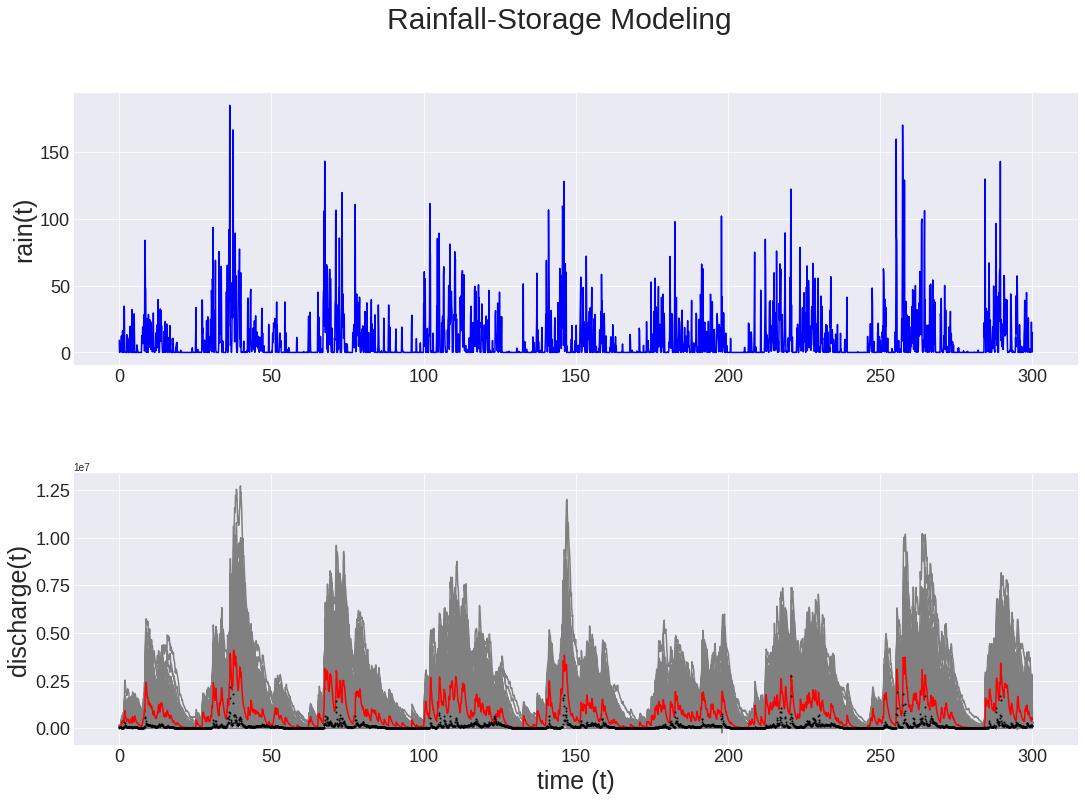

In [18]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(2,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,sim, color = 'gray')
ax[1].plot(t,sim.mean(axis=1), color = 'red')
ax[1].plot(t,discharge, 'k.', markersize = 2 )

#ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,4])
ax[1].set_xlabel('time (t)', fontsize = 25)
ax[1].set_ylabel('discharge(t)', fontsize = 25)
#ax[1].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[1].tick_params(axis='both', which='major', labelsize=18)

#fig.savefig('SDE_test2.jpg',dpi = 150)

/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


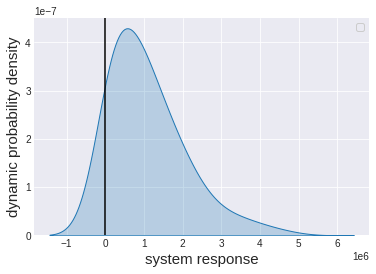

In [24]:
data = sim[:,1] #Generating data.
#plt.figure(figsize = (5,5))
sns.kdeplot(data , bw = 0.5 , fill = True)
plt.axvline(1 , 0,1, color = 'black')
plt.ylabel('dynamic probability density', fontsize = 15)
plt.xlabel('system response', fontsize = 15)
plt.legend(framealpha=1, frameon=True)
plt.show()

In [26]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [27]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')

In [28]:
save_folder = 'images/dynamicprobability'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [29]:
def plot_phase(n):
   data = sim[n,:] #Generating data.
   max = (np.histogram(data)[1])[np.argmax((np.histogram(data))[0])]
   plt.figure(figsize = (8,5))
   sns_plot = sns.kdeplot(data , bw = 0.5 , fill = True)
   plt.axvline(max, 0,1, color = 'blue')
   plt.axvline(discharge[n], 0,1, color = 'black')
   plt.xlim(0, 1000000)
   plt.ylim(0, (25*10**(-6)))
   plt.ylabel('dynamic probability density', fontsize = 15)
   plt.xlabel('system response', fontsize = 15)
   plt.legend(framealpha=1, frameon=True)
   plt.savefig('{}/{:03d}.png'.format(save_folder, n), dpi=200, bbox_inches='tight', pad_inches=0.1)
   plt.close()

In [30]:
for n in range(40):
    plot_phase(n)

/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` paramet

/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/waniomar/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, Future

In [31]:
# load all the static images into a list
save_folder = 'images/dynamicprobability'
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(save_folder))]
gif_filepath = 'images/animated-dynamicprob.gif'

In [37]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = 800 #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:],quality=50)

In [38]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) 

True

In [291]:
#IPdisplay.Image(url=gif_filepath)